In [2]:
# import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#load the data
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Notes about the data
    - Due to confidentiality issues, It contains only numerical input variables which are the result of a PCA transformation.
    - Time, Amount and Class data are in normal format, and the rest of columns is in v1 v2 like variable names given for columns to hide the identity.
    - This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced.

In [5]:
data.isna().sum() # to check if there is any nulls

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.info() # checking all the Data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data['Class'].value_counts() # checking for the imbalance

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class'>

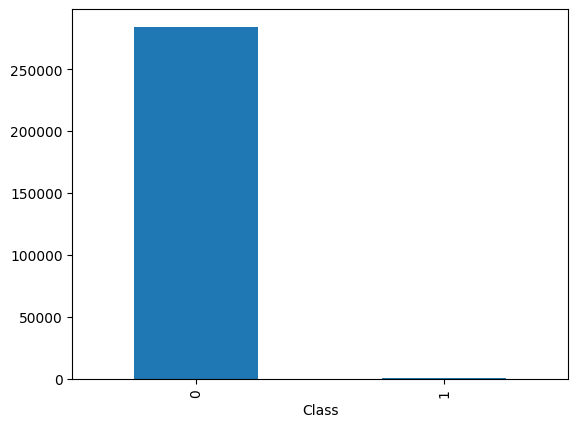

In [8]:
data['Class'].value_counts().plot(kind = 'bar')

The data is highly imbalanced with the positive class (frauds) account for 0.172% of all transactions.

### The data is in PCA transformed format so no EDA can be done

# Explore different ways to work with the imbalanced data

## First lets try to train the model with the data as it is to be a reference point

In [9]:
# define our X and y
X = data.drop(columns= 'Class')
y = data['Class']

In [10]:
# Scale the data
scaler=StandardScaler()
x=scaler.fit_transform(X)

In [11]:
# train test split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [12]:
# train random forest model
rf_model = RandomForestClassifier(random_state=42)
# fit the model on the training data
rf_model.fit(x_train,y_train)
# make predictions 
y_pred = rf_model.predict(x_test)

In [13]:
# evaluate the model
target_names = ['class 0/ not fraud', 'class 1/fraud']
print(classification_report(y_test, y_pred, target_names=target_names))


                    precision    recall  f1-score   support

class 0/ not fraud       1.00      1.00      1.00     56864
     class 1/fraud       0.97      0.77      0.86        98

          accuracy                           1.00     56962
         macro avg       0.99      0.88      0.93     56962
      weighted avg       1.00      1.00      1.00     56962



In [14]:
confusion_matrix(y_test, y_pred)

array([[56862,     2],
       [   23,    75]], dtype=int64)

### The model didn't overfit or underfit. The model performs so well when it comes to identifying non fraud cases, however we are interested in fraudulent cases which needs big improvement, especially in terms of recall, as it correctly identifies only 77% of actual fraud cases.

In [15]:
#train a logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

In [16]:
# evaluate the model
target_names = ['class 0/ not fraud', 'class 1/fraud']
print(classification_report(y_test, y_pred_lr, target_names=target_names))


                    precision    recall  f1-score   support

class 0/ not fraud       1.00      1.00      1.00     56864
     class 1/fraud       0.86      0.58      0.70        98

          accuracy                           1.00     56962
         macro avg       0.93      0.79      0.85     56962
      weighted avg       1.00      1.00      1.00     56962



In [17]:
confusion_matrix(y_test, y_pred_lr)

array([[56855,     9],
       [   41,    57]], dtype=int64)

### the same goes for the logistic regression model, but it performed significantly worse than the random forest

# Now lets try to address the class imbalance concerns

## lets first try oversampling for the data

In [18]:
# Alternative simple method
#maj_class = data[data['Class'] == 0]
#min_class = data[data['Class'] == 1]
##minority_upsampled = resample(min_class,
#                              replace=True,  # Sample with replacement
#                              n_samples=len(maj_class),  # Match number of majority class samples
#                              random_state=42)  # For reproducibility
#
## Combine majority class with upsampled minority class
#data_oversampled = pd.concat([maj_class, minority_upsampled])
#
## Shuffle the data
#data_oversampled = data_oversampled.sample(frac=1, random_state=42).reset_index(drop=True)
#
#data_oversampled['Class'].value_counts()

In [25]:
# using smote to oversample the dataset
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)
pd.Series(y_over).value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [26]:
# using the standard scalar
x_over = scaler.fit_transform(X_over)

In [27]:
# spliting the data
xo_train, xo_test, yo_train, yo_test=train_test_split(x_over,y_over, test_size=0.20, random_state=42)

In [28]:
# train the model on the new data
rf_model.fit(xo_train,yo_train)

RandomForestClassifier(random_state=42)

In [29]:
# making predections
yo_pred_rf = rf_model.predict(xo_test)

In [30]:
# evaluate the model
target_names = ['class 0/ not fraud', 'class 1/fraud']
print(classification_report(yo_test, yo_pred_rf, target_names=target_names))


                    precision    recall  f1-score   support

class 0/ not fraud       1.00      1.00      1.00     56750
     class 1/fraud       1.00      1.00      1.00     56976

          accuracy                           1.00    113726
         macro avg       1.00      1.00      1.00    113726
      weighted avg       1.00      1.00      1.00    113726



In [31]:
confusion_matrix(yo_test, yo_pred_rf)

array([[56739,    11],
       [    0, 56976]], dtype=int64)

## It is highly possible that the random forest model over fit so lets try another model

In [32]:
# logistic regression
lr_model.fit(xo_train, yo_train)
yo_pred_lr = lr_model.predict(xo_test)

In [33]:
confusion_matrix(yo_test, yo_pred_lr)

array([[56245,   505],
       [ 1698, 55278]], dtype=int64)

In [34]:
# evaluate the model
target_names = ['class 0/ not fraud', 'class 1/fraud']
print(classification_report(yo_test, yo_pred_lr, target_names=target_names))

                    precision    recall  f1-score   support

class 0/ not fraud       0.97      0.99      0.98     56750
     class 1/fraud       0.99      0.97      0.98     56976

          accuracy                           0.98    113726
         macro avg       0.98      0.98      0.98    113726
      weighted avg       0.98      0.98      0.98    113726



### The model demonstrates great performance, but some slight improvement could be made in recall for fraud detection to reach even higher accuracy.

# Now lets try undersampling

In [35]:
# Undersampling our dataset
rus = RandomUnderSampler(random_state = 42)
X_under, y_under = rus.fit_resample(X, y)

pd.Series(y_under).value_counts()


Class
0    492
1    492
Name: count, dtype: int64

In [36]:
# using standard scalar
x_under = scaler.fit_transform(X_under)

In [37]:
#spliting the data
xu_train, xu_test, yu_train, yu_test=train_test_split(x_under,y_under, test_size=0.20, random_state=42)

In [38]:
# train the model on the undersampled data
rf_model.fit(xu_train,yu_train)

RandomForestClassifier(random_state=42)

In [39]:
# make predictions 
yu_pred_rf = rf_model.predict(xu_test)

In [40]:
# evaluate the model
target_names = ['class 0/ not fraud', 'class 1/fraud']
print(classification_report(yu_test, yu_pred_rf, target_names=target_names))


                    precision    recall  f1-score   support

class 0/ not fraud       0.90      0.96      0.93        99
     class 1/fraud       0.96      0.89      0.92        98

          accuracy                           0.92       197
         macro avg       0.93      0.92      0.92       197
      weighted avg       0.93      0.92      0.92       197



In [41]:
confusion_matrix(yu_test, yu_pred_rf)

array([[95,  4],
       [11, 87]], dtype=int64)

# Now lets try the logistic regression model

In [42]:
# logistic regression
lr_model.fit(xu_train, yu_train)
yu_pred_lr = lr_model.predict(xu_test)

In [43]:
# evaluate the model
target_names = ['class 0/ not fraud', 'class 1/fraud']
print(classification_report(yu_test, yu_pred_lr, target_names=target_names))


                    precision    recall  f1-score   support

class 0/ not fraud       0.90      0.96      0.93        99
     class 1/fraud       0.96      0.90      0.93        98

          accuracy                           0.93       197
         macro avg       0.93      0.93      0.93       197
      weighted avg       0.93      0.93      0.93       197



In [44]:
confusion_matrix(yu_test, yu_pred_lr)

array([[95,  4],
       [10, 88]], dtype=int64)

# Conclusion



Both **oversampling** and **undersampling** techniques significantly improved the recall, precision, and F1-score, particularly for detecting fraudulent cases.

- In the case of **oversampling**, the **Random Forest** moshowedited signs of overfitting. However, the **Logistic Regression** model performed exceptionally well, achieving a **92% recall**, **95% F1-score**, and **98% precision** in detecting fraudulent transactions, along with an overall **95% accuracy**.

- When applying **undersampling**, both models performed similarly. Nevertheless, the **Logistic Regression** model again slightly outperformed, with a **90% recall**, **93% F1-score**, **96% precision**, and an overall **93% accuracy**.

These results suggest that **Logistic Regression** provides a more balanced and reliable approach when dealing with imbalanced datasets, particularly in detecting fraud cases, while maintaining strong overall performance.
